<a href="https://colab.research.google.com/github/rkp74/Fake-News-Classifier/blob/main/Fake_News_Classifier_using_CountVectorizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset = [Fake news Dataset](https://www.kaggle.com/competitions/fake-news/data)

# PreProcessing the Dataset

In [263]:
import pandas as pd
import numpy as np
import nltk
import re
from sklearn import metrics
import itertools

In [264]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [265]:
df = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')

In [266]:
df2.shape

(5200, 4)

In [267]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [268]:
# Get the Independent Features
X = df.drop('label',axis=1)

In [269]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [270]:
# get the dependent Features
Y = df['label']

In [271]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [272]:
df.shape

(20800, 5)

In [273]:
df2.shape

(5200, 4)

In [274]:
from sklearn.feature_extraction.text import CountVectorizer

In [275]:
df = df.dropna()


In [276]:
df.head(10)
# 6th and 8th record are missing

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [277]:
df.shape

(18285, 5)

In [278]:
messages = df.copy()
messages2 = df2.copy()

In [279]:
messages.reset_index(inplace=True)
messages2.reset_index(inplace=True)

In [280]:
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [281]:
messages2.head(10)

,index,id,title,author,text
0,0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...
5,5,20805,Trump is USA's antique hero. Clinton will be n...,NaN,Trump is USA's antique hero. Clinton will be n...
6,6,20806,Pelosi Calls for FBI Investigation to Find Out...,Pam Key,"Sunday on NBC’s “Meet the Press,” House Minori..."
7,7,20807,Weekly Featured Profile – Randy Shannon,Trevor Loudon,You are here: Home / *Articles of the Bound* /...
8,8,20808,Urban Population Booms Will Make Climate Chang...,NaN,Urban Population Booms Will Make Climate Chang...
9,9,20809,NaN,cognitive dissident,don't we have the receipt?


In [282]:
messages['title'][6]

'Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times'

In [283]:
messages2['title'][6]

'Pelosi Calls for FBI Investigation to Find Out ’What the Russians Have on Donald Trump’ - Breitbart'

In [284]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [285]:
corpus = []
for i in range(0,len(messages)):
  review = re.sub('[^a-zA-Z]', ' ' ,messages['title'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

In [286]:
corpus2 = []
for i in range(0,len(messages2)):
  review = re.sub('[^a-zA-Z]', ' ' ,str(messages2['title'][i]))
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus2.append(review)

In [287]:
corpus

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [288]:
# Applying CountVectorizer to create bag words of model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X_train = cv.fit_transform(corpus).toarray()

In [289]:
corpus2

['specter trump loosen tongu purs string silicon valley new york time',
 'russian warship readi strike terrorist near aleppo',
 'nodapl nativ american leader vow stay winter file lawsuit polic',
 'tim tebow attempt anoth comeback time basebal new york time',
 'keiser report meme war e',
 'trump usa antiqu hero clinton next presid',
 'pelosi call fbi investig find russian donald trump breitbart',
 'weekli featur profil randi shannon',
 'urban popul boom make climat chang wors',
 'nan',
 'u gener admir endors trump command chief',
 'work class hero john brennon',
 'rise mandatori vaccin mean end medic freedom',
 'communist terror small busi',
 'comput programm come forward admit paid rig vote booth trump right usa newsflash',
 'thiev take chunk chang pound berlin museum new york time',
 'new england patriot owner still sore n f l payback sight new york time',
 'colleg republican yaf sue berkeley ann coulter event breitbart',
 'trump melt accus us postal servic steal elect clinton',
 'vis

In [290]:
# Applying CountVectorizer to create bag words of model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X_test = cv.fit_transform(corpus2).toarray()

In [291]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [292]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [293]:
y_train = messages['label']

In [294]:
y_train

0        1
1        0
2        1
3        1
4        1
        ..
18280    0
18281    0
18282    0
18283    1
18284    1
Name: label, Length: 18285, dtype: int64

In [295]:
y_test = pd.read_csv('submit.csv')

In [296]:
y_test = y_test['label']

In [297]:
y_test

0       0
1       1
2       0
3       1
4       1
       ..
5195    0
5196    1
5197    0
5198    1
5199    0
Name: label, Length: 5200, dtype: int64

In [298]:
X_train.shape

(18285, 5000)

In [299]:
X_test.shape

(5200, 5000)

In [300]:
y_train.shape

(18285,)

In [301]:
y_test.shape

(5200,)

In [302]:
cv.get_feature_names_out()[:20]

array(['aaron', 'abandon', 'abba', 'abbi', 'abbi martin',
       'abbi martin expos', 'abc', 'abe', 'abedin', 'abedin email',
       'abolish', 'abort', 'abram', 'abroad', 'abroad new',
       'abroad new york', 'absolut', 'abus', 'academi', 'accept'],
      dtype=object)

In [303]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [304]:
count_df = pd.DataFrame(X_train, columns = cv.get_feature_names_out())

In [305]:
count_df.head()

,aaron,abandon,abba,abbi,abbi martin,abbi martin expos,abc,abe,abedin,abedin email,...,young,youth,youtub,youtub ban,youtub ban clinton,zero,zika,zika viru,zone,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [306]:
import matplotlib.pyplot as plt

In [307]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion matrix', cmap = plt.cm.Blues):
  plt.imshow(cm, interpolation ='nearest',cmap = cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation = 45)
  plt.yticks(tick_marks,classes)

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Confusion Matrix without Normalization")

  thresh = cm.max() / 2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j],
             horizontalalignment = "center",
             color="white" if cm[i,j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')  





# MultinomialNB Algorithm

In [308]:
from sklearn.naive_bayes import MultinomialNB
cfr = MultinomialNB()

In [309]:
cfr.fit(X_train,y_train)
pred = cfr.predict(X_test)

accuracy:  0.592 
Confusion Matrix without Normalization


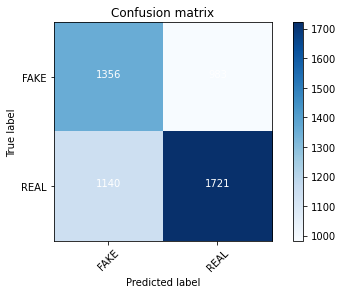

In [310]:
score = metrics.accuracy_score(y_test,pred)
print("accuracy:  %0.3f " % score)
cm = metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm, classes =['FAKE' , 'REAL'])

# Passive Aggressive Classifier Algorithm


In [311]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(n_iter_no_change=50)

In [312]:
pac.fit(X_train,y_train)
pred = pac.predict(X_test)

accuracy:  0.574 
Confusion Matrix without Normalization


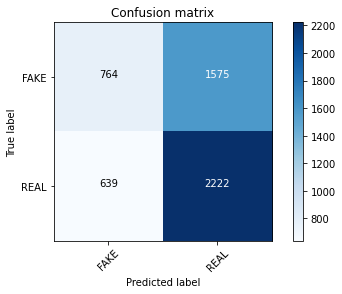

In [313]:
score = metrics.accuracy_score(y_test,pred)
print("accuracy:  %0.3f " % score)
cm = metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm, classes =['FAKE' , 'REAL'])

# MultinomialNB Algorithm with Hyperparameter


In [314]:
classifier = MultinomialNB(alpha = 0.1)

In [316]:
previous_score = 0
for alpha in np.arange(0,1,0.1):
  sub_classifier = MultinomialNB(alpha = alpha)
  sub_classifier.fit(X_train,y_train)
  y_pred = sub_classifier.predict(X_test)
  score = metrics.accuracy_score(y_test,y_pred)
  if score > previous_score:
    classifier = sub_classifier
    print("Alpha: {}, score : {}" .format(alpha,score))

/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Alpha: 0.0, score : 0.5676923076923077
Alpha: 0.1, score : 0.5884615384615385
Alpha: 0.2, score : 0.5978846153846153
Alpha: 0.30000000000000004, score : 0.5982692307692308
Alpha: 0.4, score : 0.5969230769230769
Alpha: 0.5, score : 0.595
Alpha: 0.6000000000000001, score : 0.5940384615384615
Alpha: 0.7000000000000001, score : 0.5940384615384615
Alpha: 0.8, score : 0.5930769230769231
Alpha: 0.9, score : 0.5907692307692308


In [318]:
## Get Features names
feature_names = cv.get_feature_names_out()

In [322]:
classifier.feature_log_prob_ [0]

array([ -9.09509099,  -9.25044143, -10.36600328, ...,  -9.79545842,
       -11.83234035,  -9.79545842])

In [323]:
#### Most Real
sorted(zip(classifier.feature_log_prob_ [0], feature_names), reverse = True)[:20]

[(-2.923270249807919, 'net'),
 (-2.970155757948026, 'thugocraci'),
 (-2.9756794131764988, 'year prison'),
 (-2.9758376810927576, 'new york citi'),
 (-2.991149229210066, 'yet new york'),
 (-2.991149229210066, 'news daili'),
 (-3.9433808884948114, 'break hillari'),
 (-3.998608069748035, 'trip'),
 (-5.286192796255999, 'digit'),
 (-5.292593842275822, 'dim'),
 (-5.753424707971507, 'russian hack'),
 (-6.023530748780958, 'nsa'),
 (-6.047148580702234, 'clean'),
 (-6.1628426423932385, 'staff'),
 (-6.182193091370178, 'prayer'),
 (-6.217996438184787, 'assembl'),
 (-6.230221529314047, 'rejoic'),
 (-6.246757664690272, 'hit record'),
 (-6.2551294172270095, 'breakdown'),
 (-6.356807030887457, 'healthcar')]

In [324]:
### Most Fake
sorted(zip(classifier.feature_log_prob_ [0], feature_names))[:20]

[(-11.832340350193748, 'accept'),
 (-11.832340350193748, 'acquit'),
 (-11.832340350193748, 'across'),
 (-11.832340350193748, 'action'),
 (-11.832340350193748, 'admir'),
 (-11.832340350193748, 'airport'),
 (-11.832340350193748, 'al qaeda'),
 (-11.832340350193748, 'america great'),
 (-11.832340350193748, 'american'),
 (-11.832340350193748, 'american histori'),
 (-11.832340350193748, 'apolog'),
 (-11.832340350193748, 'applic'),
 (-11.832340350193748, 'appoint'),
 (-11.832340350193748, 'attorney'),
 (-11.832340350193748, 'australian'),
 (-11.832340350193748, 'back new york'),
 (-11.832340350193748, 'balkan'),
 (-11.832340350193748, 'bank'),
 (-11.832340350193748, 'bare'),
 (-11.832340350193748, 'barron')]